## Explore stats

- Explore statistical connections between the weather variables in Aarhus, and the day ahead spot price for DK1 (West Denmark zone)

In [10]:
import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
from load_dfs import load_openmeteo,load_spotprices

In [12]:
AarhusWeatherdf=load_openmeteo()
DK1spot=load_spotprices()

/Users/jonassinjan/Documents/spotprice_weather_2024/load_dfs.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DK1spotPricesdf.drop('PriceArea', axis=1, inplace=True)


## Pearson Correlation Coefficient Matrix

- measure the strength and direction of linear relationship between target and input features
- to determine if a simple linear regression, ridge regression or SVR with linear kernel might be a good model

In [13]:
#need to merge as one df, to run df.corr()
mergeddf = pd.merge(AarhusWeatherdf,DK1spot,left_on='time',right_on='HourDK')

In [14]:
mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   time                                          8784 non-null   datetime64[ns]
 1   temperature_2m (°C)                           8784 non-null   float64       
 2   relative_humidity_2m (%)                      8784 non-null   int64         
 3   dew_point_2m (°C)                             8784 non-null   float64       
 4   apparent_temperature (°C)                     8784 non-null   float64       
 5   precipitation (mm)                            8784 non-null   float64       
 6   rain (mm)                                     8784 non-null   float64       
 7   snowfall (cm)                                 8784 non-null   float64       
 8   snow_depth (m)                                8280 non-null   float6

In [15]:
mergeddf.head()

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),weather_code (wmo code),...,shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),global_tilted_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²),HourUTC,HourDK,SpotPriceDKK,SpotPriceEUR
0,2024-01-01 00:00:00,5.8,95,5.1,2.7,0.3,0.3,0.0,0.0,51,...,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-31 23:00:00,2024-01-01 00:00:00,126.660004,16.990000
1,2024-01-01 01:00:00,5.5,94,4.7,2.0,0.1,0.1,0.0,0.0,51,...,0.0,0.0,0.0,0.0,0.0,0.0,2024-01-01 00:00:00,2024-01-01 01:00:00,209.779999,28.139999
2,2024-01-01 02:00:00,5.4,93,4.4,2.0,0.1,0.1,0.0,0.0,51,...,0.0,0.0,0.0,0.0,0.0,0.0,2024-01-01 01:00:00,2024-01-01 02:00:00,198.740005,26.660000
3,2024-01-01 03:00:00,5.2,95,4.4,1.4,0.1,0.1,0.0,0.0,51,...,0.0,0.0,0.0,0.0,0.0,0.0,2024-01-01 02:00:00,2024-01-01 03:00:00,30.860001,4.140000
4,2024-01-01 04:00:00,5.0,94,4.1,1.0,0.0,0.0,0.0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,2024-01-01 03:00:00,2024-01-01 04:00:00,-0.220000,-0.030000


In [16]:
vardf = mergeddf.drop(['time','HourDK','HourUTC','HourDK'],axis=1)
corr=vardf.corr()

<Axes: >

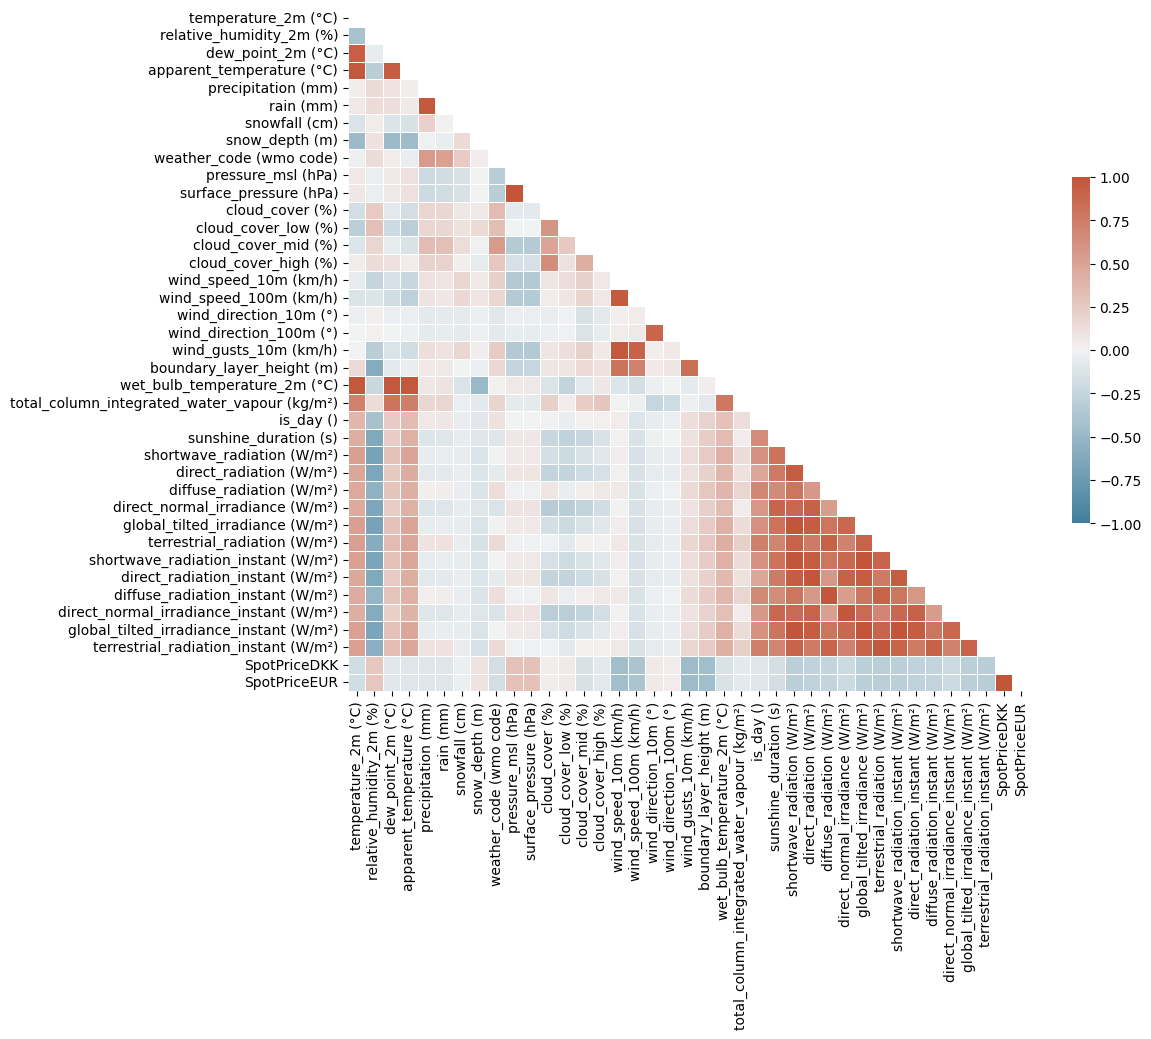

In [17]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
#expected 1:1 correlation between PriceDK and PriceEUR

(vardf['SpotPriceDKK']/vardf['SpotPriceEUR']).describe()

count    8735.000000
mean        7.457080
std         0.029496
min         7.000000
25%         7.457521
50%         7.458763
75%         7.460880
max         7.500000
dtype: float64

In [19]:
# Find the most highly correlated (or anti-correlated) variables with SpotPriceDKK
correlation_with_spotprice = abs(corr['SpotPriceDKK']).sort_values(ascending=False)
print(correlation_with_spotprice)

SpotPriceDKK                                    1.000000
SpotPriceEUR                                    1.000000
wind_gusts_10m (km/h)                           0.469359
wind_speed_10m (km/h)                           0.449547
boundary_layer_height (m)                       0.448960
wind_speed_100m (km/h)                          0.396645
terrestrial_radiation_instant (W/m²)            0.313404
terrestrial_radiation (W/m²)                    0.309291
pressure_msl (hPa)                              0.304562
surface_pressure (hPa)                          0.303205
global_tilted_irradiance_instant (W/m²)         0.300395
shortwave_radiation (W/m²)                      0.300144
global_tilted_irradiance (W/m²)                 0.300144
shortwave_radiation_instant (W/m²)              0.299884
direct_radiation (W/m²)                         0.276626
direct_radiation_instant (W/m²)                 0.274389
relative_humidity_2m (%)                        0.268491
diffuse_radiation_instant (W/m²

## Spot Price Autocorrelation

In [ ]:
#autocovariance function (acf)

from statsmodels.tsa.stattools import acf

acf_values = acf(vardf['SpotPriceDKK'], nlags=40)

In [21]:
acf_values

array([1.        , 0.92929938, 0.80220185, 0.66968962, 0.55715919,
       0.47481562, 0.42318458, 0.39863496, 0.39445743, 0.40174055,
       0.41092883, 0.41116556, 0.40401184, 0.38074955, 0.34693018,
       0.30871032, 0.27537673, 0.25769867, 0.26017187, 0.28693998,
       0.33952088, 0.41405411, 0.50195681, 0.57777131, 0.60495696,
       0.55686482, 0.4626068 , 0.35991464, 0.26989746, 0.20303255,
       0.16177683, 0.14550125, 0.14851667, 0.16459392, 0.18381661,
       0.19541819, 0.19479197, 0.17694729, 0.14560887, 0.10788728,
       0.07592092])

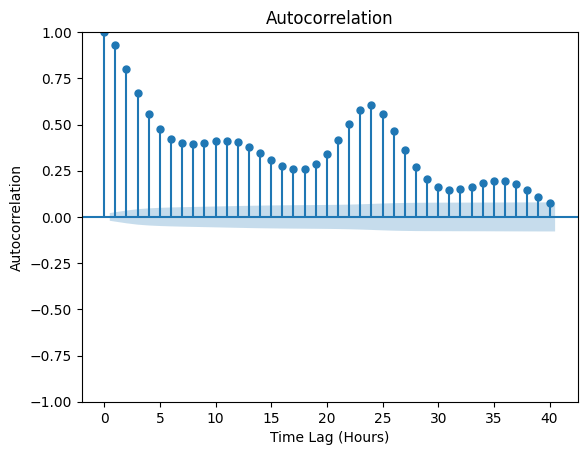

In [ ]:
#shaded region is 95% confidence interval, so if the line is outside the shaded region, it is statistically significant

from statsmodels.graphics.tsaplots import plot_acf

fig=plot_acf(vardf['SpotPriceDKK'], lags=40)
plt.xlabel('Time Lag (Hours)')
plt.ylabel('Autocorrelation')
plt.show()

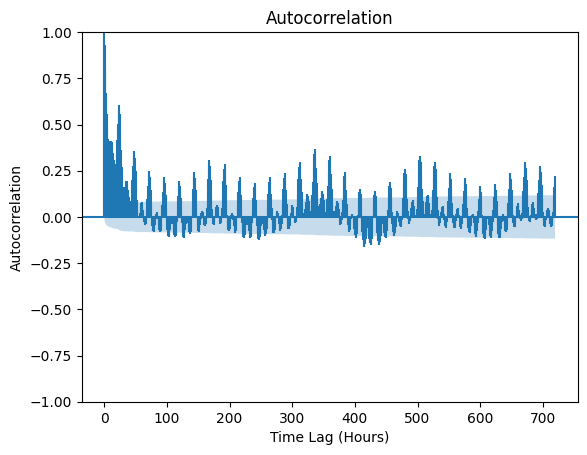

In [23]:
#up to 30 days

plot_acf(vardf['SpotPriceDKK'], lags=np.arange(24*30),markersize=0.01)
plt.xlabel('Time Lag (Hours)')
plt.ylabel('Autocorrelation')
plt.show()

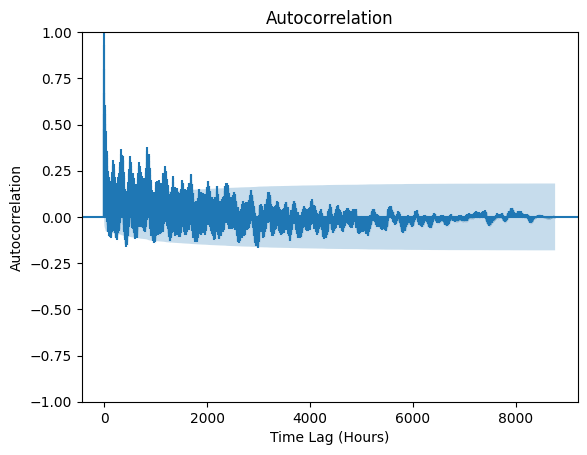

In [51]:
#all hours throughout the year

plot_acf(vardf['SpotPriceDKK'], lags=np.arange(24*365),markersize=0.01, alpha=0.05)
plt.xlabel('Time Lag (Hours)')
plt.ylabel('Autocorrelation')
plt.show()

In [33]:
# Get Lags where the autocorrelation is above 0.5, 0.25
acf_all = acf(vardf['SpotPriceDKK'], nlags=(24*365))
lags_above_05 = np.where(acf_all > 0.5)[0]
lags_above_025 = np.where(acf_all > 0.25)[0]

In [34]:
lags_above_05

array([ 0,  1,  2,  3,  4, 22, 23, 24, 25])

In [38]:
np.set_printoptions(suppress=True)

In [39]:
lags_above_025/24

array([ 0.        ,  0.04166667,  0.08333333,  0.125     ,  0.16666667,
        0.20833333,  0.25      ,  0.29166667,  0.33333333,  0.375     ,
        0.41666667,  0.45833333,  0.5       ,  0.54166667,  0.58333333,
        0.625     ,  0.66666667,  0.70833333,  0.75      ,  0.79166667,
        0.83333333,  0.875     ,  0.91666667,  0.95833333,  1.        ,
        1.04166667,  1.08333333,  1.125     ,  1.16666667,  1.91666667,
        1.95833333,  2.        ,  2.04166667,  6.95833333,  7.        ,
        7.04166667,  7.95833333,  8.        , 12.95833333, 13.        ,
       13.04166667, 13.91666667, 13.95833333, 14.        , 14.04166667,
       14.08333333, 14.95833333, 15.        , 15.04166667, 20.        ,
       20.95833333, 21.        , 21.04166667, 21.95833333, 22.        ,
       22.04166667, 27.95833333, 28.        , 28.04166667, 28.95833333,
       29.        , 34.        , 34.91666667, 34.95833333, 35.        ,
       35.04166667, 35.08333333, 35.91666667, 35.95833333, 36.  

Text(0, 0.5, 'Autocorrelation')

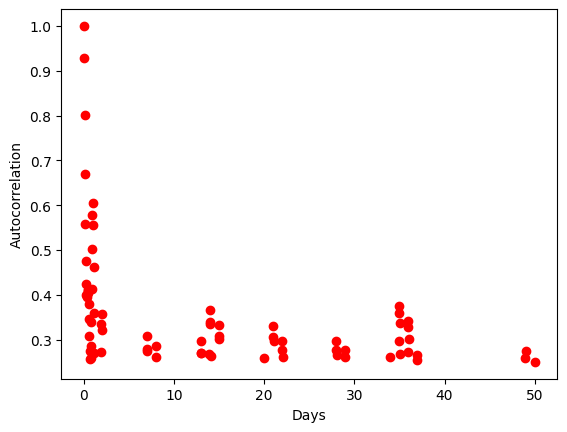

In [41]:
plt.scatter(lags_above_025/24, acf_all[lags_above_025], color='red')
plt.xlabel('Days')
plt.ylabel('Autocorrelation')

Text(0, 0.5, 'Autocorrelation')

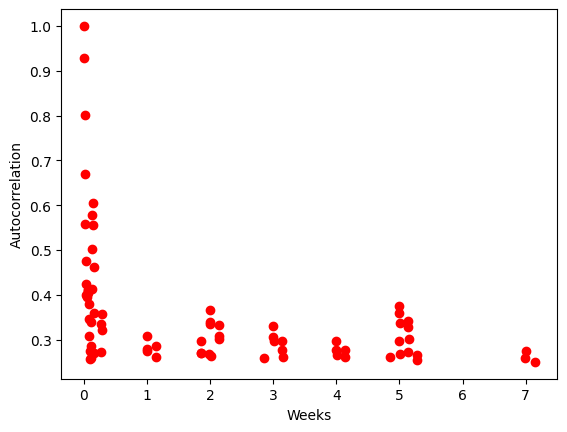

In [42]:
plt.scatter(lags_above_025/(24*7), acf_all[lags_above_025], color='red')
plt.xlabel('Weeks')
plt.ylabel('Autocorrelation')

In [56]:
# Get all acf values above the 95% confidence interval

acf_all, confint = acf(vardf['SpotPriceDKK'], nlags=(24*365), alpha=0.05)
#lags_above_conf = np.where(acf_all > confint)[0]

In [58]:
diff = np.abs(acf_all - confint[:,0])
lags_above_conf = np.where(acf_all > diff)[0]

Text(0, 0.5, 'Autocorrelation')

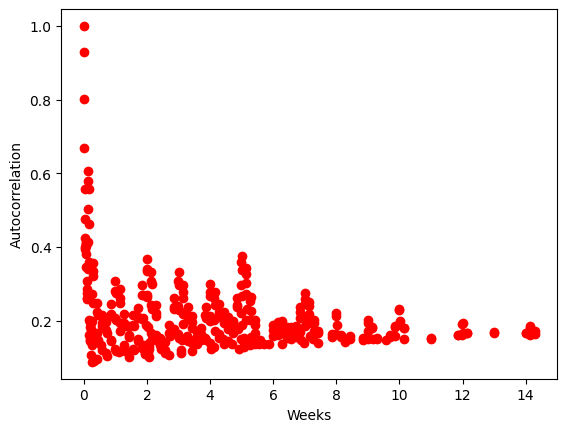

In [62]:
plt.scatter(lags_above_conf/(24*7), acf_all[lags_above_conf], color='red')
plt.xlabel('Weeks')
plt.ylabel('Autocorrelation')

### Clear Day and Week autocorrelation.

## Spearman Rank Correlation/Mutial Information Test

-  to test for monotonic or nonlinear relationships between target and input features
-  if strong values, suitable models might be SVR with non linear kernels, or Tree-based models (Random Forest, Gradient Boosting etc.)

## Feature Importance

- test ANOVA F-test or Feature Importances
- to test where a feature explains the variance in the target variable
- suitable models would be any that assume variance differences are important (linear or tree-based models)

## Normality of the Target

- Shapiro-Wilk or Kolmogorov-Smirnov test
- test whether the target variable (ie Spotprice) is normally distributed
- could impact the suitability of parametric models (linear regression)